In [3]:
import numpy as np
import matplotlib.pyplot as plt

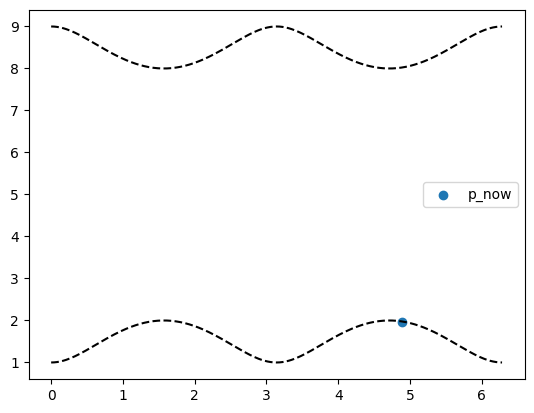

In [6]:
H = 10 # channel of height 10
W = 2 * np.pi # This sort of doesn't matter because things are sinusoidal but apparently I'm doing it anyway
a, b = 2, 1



def give_reflection(p_intersect, p1, boundary_func_deriv):

    theta_intersect = p_intersect[0]
    tangent = np.array([1, -boundary_func_deriv(a, b, theta_intersect)[0]]).reshape((2,1))
    tangent = tangent/np.linalg.norm(tangent)
    projection = p_intersect + np.dot((p1 - p_intersect).T, tangent) * tangent
    reflection = 2 * projection - p1
    return reflection


p_now = np.array([np.float64(4.890482799458029), np.float64(1.9739965770657113)])

oval_vert_dist = lambda a, b, theta: abs(np.sqrt(a**2*np.sin(theta)**2 + b**2*np.cos(theta)**2))
lower_bound = lambda a, b, theta: 0 + oval_vert_dist(a, b, theta)
upper_bound = lambda a, b, theta: H - oval_vert_dist(a, b, theta)
lower_bound_deriv = lambda a, b, theta: (np.cos(theta)*np.sin(theta)*(b**2 - a**2))/ \
    (np.sqrt(a**2*np.cos(theta)**2 + b**2*np.sin(theta)**2))
upper_bound_deriv = lambda a, b, theta: lower_bound_deriv(a, b, theta) * -1

theta_grid = np.linspace(0, W, 301)
plt.plot(theta_grid, lower_bound(a, b, theta_grid), color='black', linestyle='--')
plt.plot(theta_grid, upper_bound(a, b, theta_grid), color='black', linestyle='--')
plt.scatter(p_now[0], p_now[1], label='p_now')
plt.legend()

In [7]:
p_now[1] - lower_bound(a, b, p_now[0])

np.float64(-0.0023256446651385154)

In [11]:
# Ok we have examples that are breaking! Let's see exactly what is happening then.


np.float64(4.890482799458029)